In [3]:
#import sys is needed to set a max treshold to view the entirety of the r matrix 
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import sys  
#For the scaling factor code
import random
import math
import matplotlib.ticker as mtick

(array([78, 79, 80, 81]),)
[4.25001e-08 1.28122e-07 1.96790e-07]
[[1.00000000e-01 1.00000000e-01 3.49522878e-12]
 [1.00000000e-01 2.00000000e-01 3.06984838e-12]
 [1.00000000e-01 3.00000000e-01 2.42434012e-12]
 [1.00000000e-01 4.00000000e-01 1.65389260e-12]
 [1.00000000e-01 5.00000000e-01 8.91769852e-13]
 [1.00000000e-01 6.00000000e-01 3.09311372e-13]
 [1.00000000e-01 7.00000000e-01 1.15932080e-13]
 [1.00000000e-01 8.00000000e-01 5.59122341e-13]
 [1.00000000e-01 9.00000000e-01 1.92444796e-12]
 [1.00000000e-01 1.00000000e+00 4.53555019e-12]
 [1.00000000e-01 1.10000000e+00 8.75414570e-12]
 [1.00000000e-01 1.20000000e+00 1.49800266e-11]
 [1.00000000e-01 1.30000000e+00 2.36510606e-11]
 [1.00000000e-01 1.40000000e+00 3.52431905e-11]
 [1.00000000e-01 1.50000000e+00 5.02704349e-11]
 [1.00000000e-01 1.60000000e+00 6.92848876e-11]
 [1.00000000e-01 1.70000000e+00 9.28767180e-11]
 [1.00000000e-01 1.80000000e+00 1.21674171e-10]
 [1.00000000e-01 1.90000000e+00 1.56343566e-10]
 [1.00000000e-01 2.0000

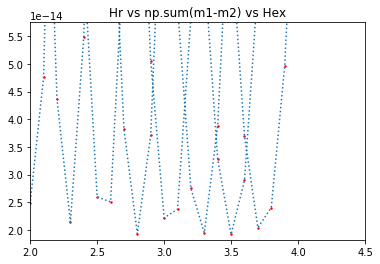

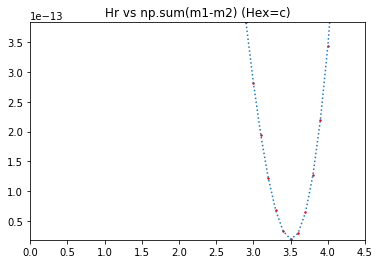

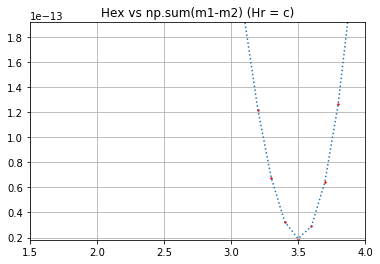

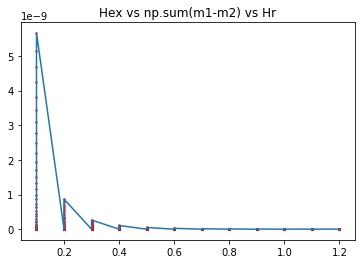

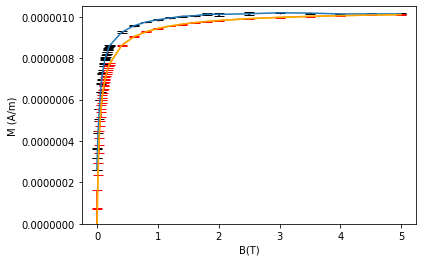

(array([474]), array([2]))
[1.10000000e+00 3.50000000e+00 1.91716797e-14]
[1.1000000e+00 3.4000000e+00 3.2760238e-14]


(0, 1.15e-06)

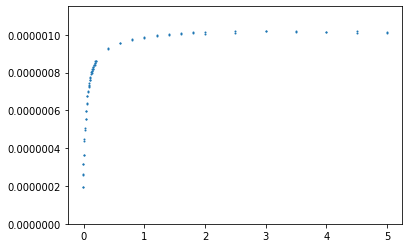

In [6]:
# arrays for loop                   ### SAMPLE 1 ZONE 2 ### (DELETED DATA AROUND Y=0)
r = np.zeros([1000000,3])                   
o = np.zeros([10000,2])

# Getting the data for SAMPLE 1 ZONE 2         
data = np.genfromtxt('S1Zone2')  
X = data[:,][:,0] # Magnetic field B data 
Y = data[:,][:,1] # Magnetisation M data
r = np.zeros([10000000,3])
Hc = 0.0273481639 # value of B where M=0
Ms = 1.02781E-6 # saturation magnetisation


# Getting rid of values smaller than 14% of Msat due to measurement errors in the data
print(np.where(Y<0.15*Ms)) # Printing the data points being deleted
X = X[np.where(Y>0.15*Ms)]
Y = Y[np.where(Y>0.15*Ms)]


# MEAN DATA
mdata = np.genfromtxt('S1Z2 MEAN.txt')
mX = mdata[:,][:,0] #B data
mY = mdata[:,][:,1] #M data

#Getting rid of values smaller than 14% of Msat 
print(mY[np.where(mY<0.2*Ms)]) # Printing the data points being deleted
inxER = np.where(mY>0.2*Ms) # condition to keep future arrays of same size
mX = mX[np.where(mY>0.2*Ms)]
mY = mY[np.where(mY>0.2*Ms)]


n = 0 # nmax, mmax = 7000 good habit
m = 0

# Loop which incorporates the model "M2" into an 
# array based on its parameter values (Hex and Hr):
for Hex in np.arange(0.1,1.3,0.1):     # btw 0.1 and 1.3 --> outer limit exclusive, step 0.1
    for Hr in np.arange(0.1,4.5,0.1):  # btw 0.1 and 4.5   --> outer limit exclusive, step 0.1
        λ = (Hr/Hex)
        p = ((mX+Hc)/Hex)**0.5 
        M2= Ms*(1 - (λ**2/(30*p**4))*(2 - ((2 + 2*p + p**2)*np.exp(-p))))
        r[n,0] = Hex
        r[n,1] = Hr
        r[n,2] = np.sum((M2-mY)**2) 
        inx = np.min(r[n,2])
        
        dHr = Hr - 0.005
        dHex = Hex - 0.005
        dMs = Ms - 0.002E-6
        dHc = Hc - 0.0020
        λ2 = (dHr/dHex)
        p2 = ((mX+dHc)/dHex)**0.5  # dMs and λ2 and p2
        dM2 = np.absolute(M2 - (dMs*(1 - (λ2**2/(30*p2**4))*(2 - ((2 + 2*p2 + p2**2)*np.exp(-p2)))))   )
    
    
        n+=1  

# Printing ALL VALUES: (inx to get rid of np.zeros)
inx = r[:,1]>0
r = r[inx]

#np.set_printoptions(threshold=sys.maxsize) --> use this line to view entire matrix
print(r)
print(r[r[:,2]==np.min(r[:,2])])

#   1st Graph: 

# Hr vs np.sum(m1-m2) vs Hex
# aligning points + scatter plot in one
plt.plot(r[:,1],r[:,2], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1],r[:,2],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('Hr vs np.sum(m1-m2) vs Hex')
# Steve's idea to estimate np.min(r[:,2] error)
plt.xlim(2,4.5)
plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])]) # 2nd limit was 3*
plt.show()

#   2nd Graph:

# same but Hex = 1.5
MinSum = r[:,2]==np.min(r[:,2])
z = r[MinSum]
#print(z)
z[0]
Hex = z[0,0]
Hr = z[0,1]
#plot, using r[:,0]==Hex condition
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('Hr vs np.sum(m1-m2) (Hex=c)')
plt.xlim(0,4.5) # was 2
plt.ylim([0.95*np.min(r[:,2]),20*np.min(r[:,2])]) # was 3
plt.show()

# VISIBLE ERROR on np.sum 
plt.xlim(1.5,4)
plt.ylim([0.95*np.min(r[:,2]),10*np.min(r[:,2])])
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('ERROR - Hr vs np.sum(m1-m2) vs Hex - ')
plt.grid()


#   3rd Graph:

# Hex vs np.sum(m1-m2) but Hr = ?
plt.plot(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,0][r[:,1]== Hr],r[:,2][r[:,1]== Hr],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.title('Hex vs np.sum(m1-m2) (Hr = c)')
#plt.xlim(2,4.5)
#plt.ylim([0.95*np.min(r[:,2]),3*np.min(r[:,2])])
plt.show()


#   4th Graph(s):

# Hex vs np.min(sum(M2-M1))
plt.plot(r[:,0],r[:,2])
plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
plt.title('Hex vs np.sum(m1-m2) vs Hr')
plt.show()
# Zoom in
#plt.xlim(0,1.5)
#plt.ylim([0.95*np.min(r[:,2]),70*np.min(r[:,2])])
#plt.plot(r[:,0],r[:,2])
#plt.scatter(r[:,0],r[:,2],s=2, c="red", alpha=1)
#plt.show()


# 5th Graph (M_ram and M_data):
# This graph directly compares the model magnetisation (orange) with the data (blue)
#Plotting
#plt.scatter(X,Y,s=2, c="blue", alpha=1)
plt.scatter(mX,mY,s=1, c="red", alpha=1)


# Standard Error of Mean (already half) 
SE = np.genfromtxt('S1Z2MEANERROR.txt')[inxER] #Don't forget inx!
plt.errorbar(mX,mY, yerr=SE, capsize=5, capthick=1, ecolor="black")


plt.plot(mX,M2,color="orange")                                     # @@@@  W.A.S  X before!
plt.ylim(0,10.5E-7)
plt.xlabel('B(T)')
plt.ylabel('M (A/m)')
#plt.title('M_data + M_ram vs Magnetic Field')
plt.errorbar(mX,M2, yerr=[dM2,dM2], capsize=5, capthick=1, ecolor="red", color="orange")
plt.show()




#print(np.where(r[:,1][r[:,0]== Hex])#[r[:,1]== Hr]))



print(np.where(r == np.min(r[:,2])))
print(r[474])
print(r[473])


#print(M2)
#print(dM2)

plt.scatter(X,Y,s=1,alpha=1)
plt.ylim(0,11.5E-7)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4]
[3.63748559e-12 3.61986655e-12 3.59059706e-12 3.54982043e-12
 3.49773734e-12 3.43460580e-12 3.36074114e-12 3.27651603e-12
 3.18236048e-12 3.07876182e-12 2.96626474e-12 2.84547124e-12
 2.71704066e-12 2.58168967e-12 2.44019230e-12 2.29337988e-12
 2.14214108e-12 1.98742194e-12 1.83022578e-12 1.67161329e-12
 1.51270249e-12 1.35466872e-12 1.19874467e-12 1.04622036e-12
 8.98443129e-13 7.56817671e-13 6.22806003e-13 4.97927478e-13
 3.83758785e-13 2.81933945e-13 1.94144313e-13 1.22138580e-13
 6.77227686e-14 3.27602380e-14 1.91716797e-14 2.89351201e-14
 6.40859193e-14 1.26716772e-13 2.18977706e-13 3.43076084e-13
 5.01276603e-13 6.95901294e-13 9.29329521e-13 1.20399798e-12]


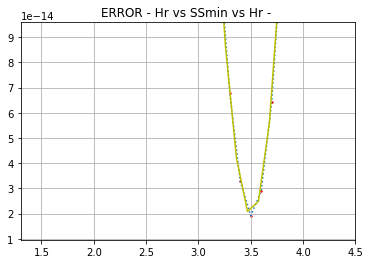

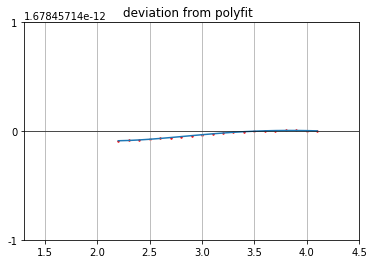

In [7]:
# Here some attempts were made to visualise the error in one of the earlier graphs 
# and to compare with a Polyfit function


#### VISIBLE ERROR on np.sum of 2nd Graph + Polyfit
plt.xlim(1.3,4.5)
plt.ylim([0.5*np.min(r[:,2]),5*np.min(r[:,2])])
plt.plot(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex], ':') #[r[:,1] == 1.5]
plt.scatter(r[:,1][r[:,0]== Hex],r[:,2][r[:,0]== Hex],s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.yscale("linear")
plt.xscale("linear")
plt.title('ERROR - Hr vs SSmin vs Hr - ')


x = r[:,1][r[:,0]== Hex] #Hr
print(x)
y = r[:,2][r[:,0]== Hex] #np.sum(M_ram - M_data)^2
print(y)

# Assume point of inflexion at ~ 2.1
# Thus x[x[:]>2] makes polyfit STARTS at x=2.1 ... same for y!
X = x[(x[:]>2.1)&(x[:]<4.2)] # When entering more than 1 boolean condition. use paretheses and "&" symbol
Y = y[(x[:]>2.1)&(x[:]<4.2)]                   #y[x[:]>2.1]
# x , y , power 
c = np.polyfit(X,Y, 3)  
p = np.poly1d(c)
px = np.linspace(2.1,4.1,20) #px index size must match x>2.1 for future comparison plot (N=23)
py = p(px)
plt.plot(px, py, 'y', label='Polynomial power 2') #px = np.linspace(1,3000,200) and [::2] means step of 2
#print(c)
#print(p)
plt.grid()
plt.show()


#print(X)
#print("- - -")
#print(Y)
#print("- - -")
#print(py) 
#print("- - -")
#print(Y-py)




# Polyfit is a good fit from 2.1 onwards 
# Next, to show how much of a good fit it is....
plt.xlim(1.3,4.5)
#plt.ylim([float(-3.2*np.min(r[:,2])),float(5*np.min(r[:,2]))])
plt.plot(X,Y-py)
plt.scatter(X,(Y-py),s=2, c="red", alpha=1) # s=area, c=colours, alpha=??
plt.axhline(c="black", linewidth=0.6)
#plt.axvline(y=0) #vertical line
plt.yscale("linear")
plt.title('deviation from polyfit  ')
plt.grid()


# CHANGING SCALING Factor of matplot graph to 1.67845714e-12:
plt.yticks(np.linspace(-1*1.67845714e-12, 1*1.67845714e-12, 3)) # <--- C.H.O.O.S.E  R.A.N.G.E  !!! (NO r[NP.MIN])
# USING Custom Scalar Formatter Class:
class ModScalarFormatter(mtick.ScalarFormatter):
    def __init__(self, useOffset=None, useMathText=None, useLocale=None):
        mtick.ScalarFormatter.__init__(self, useOffset, useMathText, useLocale)
        self.ticks = [i for i in range(-1,2)]  #  <-----------------------  A.N.D  H.E.R.E !!! (outer lim exclusive)
    def _set_offset(self, text):
        self.offset = text 
    def get_offset(self, txt=''):
        return self.offset 
    def __call__(self, x, pos=None):
        return self.ticks[pos]
# USING FUNCTION
sf = ModScalarFormatter(useOffset=1.67845714e-12) #   <------------- A.N.D  H.E.R.E !!! (NO r[NP.MIN] .. numbers only)
plt.gca().yaxis.set_major_formatter(sf)
# THE END
plt.show()
